In [146]:
%matplotlib inline
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Funciones de simetria

## Funcion de corte

\begin{equation}
   f_c(R_{ij})= \left\{\begin{matrix}
 \frac{1}{2} \left[ \cos \left(\frac{\pi R_{ij}}{R_{c}} \right) + 1 \right ]& \text{para } R_{ij} \leq R_{c}\\ 
 0 & \text{para } R_{ij} > R_{c}
\end{matrix}\right.    
\end{equation}

## Funcion de densidad Radial

\begin{equation}
FDR_i(R_{ij}) = \sum_{j=1}^{N_\nu} f_c(R_{ij}) \cdot e^{-\eta \left( R_{ij} - R_s \right)^2} 
\end{equation}

## Funcion de densidad Angular

\begin{equation}
FDA_i(R_{ij},R_{ik},\theta_{ijk}) =
 2^{1-\zeta } \sum_{j\neq i}^{N_\nu} \sum_{k \neq i,j}^{N_\sigma}
 f_c(R_{ij}) f_c(R_{ik}) \cdot
 \left ( 1 + \lambda \cos  \theta_{ijk} \right )^\zeta 
 e^{-\eta \left( R_{ij}^2 + R_{ik}^2 \right)} 
\end{equation}



$   F(\theta , R) =  \cos(R/R_c) * (1+cos(\theta)) * e^{-R}
$

In [56]:
 
def fc_term(R_ij, R_c):
    return 0.5 * (np.cos(np.pi * R_ij / R_c) + 1) * (R_ij <= R_c)

def FDRi_term(R_ij, eta, R_c, R_s=0):
    return fc_term(R_ij, R_c) * np.exp(-eta * (R_ij - R_s)**2)

def FDAi_term(R_ij,  theta_ijk, R_c, zeta, lambd,R_ik = 0,eta = 0.05):
    return (
        2**(1 - zeta) * fc_term(R_ij, R_c) * fc_term(R_ik, R_c) *
        (1 + lambd * np.cos(theta_ijk))**zeta * np.exp(-eta * (R_ij**2 + R_ik**2))
    )

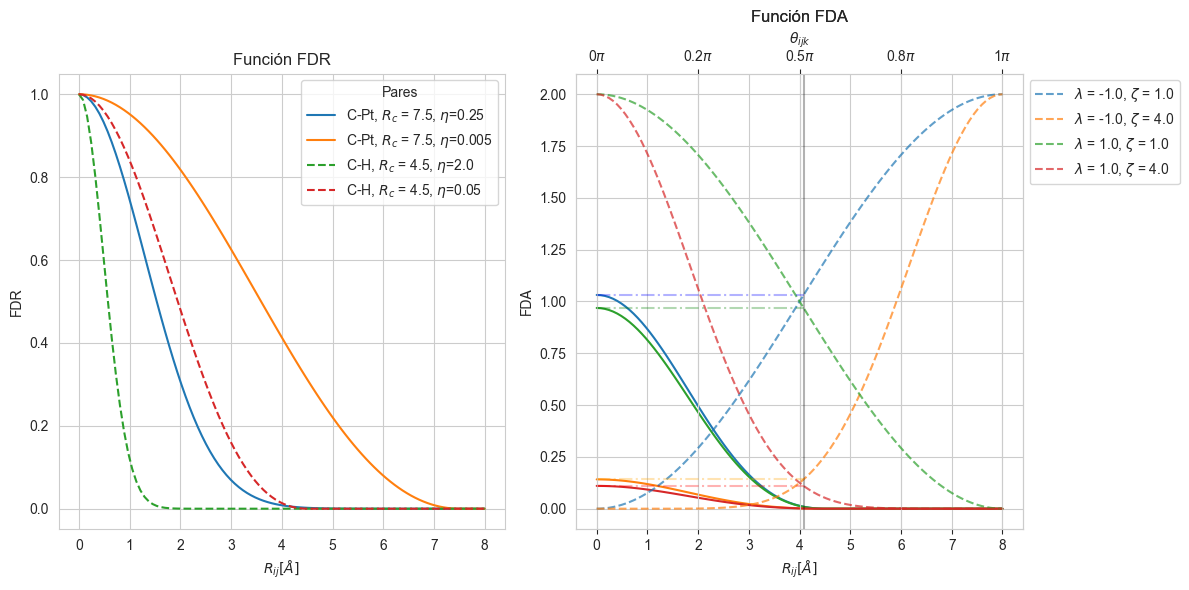

In [139]:
# Rango de valores para R_ij
R_ij_values = np.linspace(0, 8, 100)

# Parámetros para FDR
G_FDR = 2 
eta_FDR_values = [0.25000,  0.00500]  

# Configurar subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Graficar FDR en el primer subgráfico Pt
axes[0].set_title("Función FDR")
for i in range(2):
    F_values = FDRi_term(R_ij_values, eta_FDR_values[i], R_c = 7.5)
    axes[0].plot(R_ij_values, F_values, label=f"C-Pt, $R_c$ = 7.5, $\eta$={eta_FDR_values[i]}") 
# Graficar FDR en el primer subgráfico H
axes[0].set_title("Función FDR")

 
eta_FDR_values = [2.0,  0.05000] 
for i in range(2):
    F_values = FDRi_term(R_ij_values, eta_FDR_values[i], R_c = 4.5)
    axes[0].plot(R_ij_values, F_values, label=f"C-H, $R_c$ = 4.5, $\eta$={eta_FDR_values[i]}", linestyle='--')
axes[0].set_xlabel(r'$R_{ij} [\AA]$')
axes[0].set_ylabel("FDR")
axes[0].legend(title='Pares')

 
G_FDA = 4
type2_FDA_values = ["H", "H", "H", "H"]
type3_FDA_values = ["H", "H", "H", "H"] 
lambda_FDA_values = [-1.0, -1.0, 1.0, 1.0]
zeta_FDA_values = [1.0, 4.0,  1.0, 4.0]
Rc_FDA_values = [ 4.5000, 4.500000,  4.5000, 4.500000]



ang = 0.51*np.pi
# Graficar FDA en el segundo subgráfico
axes[1].set_title("Función FDA")
for i in range(len(type2_FDA_values)):
    F_values = FDAi_term(R_ij_values,   ang, Rc_FDA_values[i], zeta_FDA_values[i], lambda_FDA_values[i])
    axes[1].plot(R_ij_values, F_values, label=f"C-H-H: $\lambda$ = {lambda_FDA_values[i]}, $\zeta$ = {zeta_FDA_values[i]}")
axes[1].set_xlabel(r'$R_{ij} [\AA]$ ')
axes[1].set_ylabel("FDA")



ax2 = axes[1].twiny()
# Graficar FDA en el segundo subgráfico
ax2.set_title("Función FDA")
for i in range(len(type2_FDA_values)):
    F_values = FDAi_term(0,   theta_values, Rc_FDA_values[i], zeta_FDA_values[i], lambda_FDA_values[i])
    ax2.plot(theta_values, F_values, label=f"$\lambda$ = {lambda_FDA_values[i]}, $\zeta$ = {zeta_FDA_values[i]}", linestyle='--', alpha = 0.7)
ax2.set_xlabel(r'$\theta_{ijk}$')
ax2.set_ylabel("FDA")
ax2_ticks = np.linspace(0, np.pi, 5)  # Ajusta según tus necesidades
ax2.set_xticks(ax2_ticks)
ax2.set_xticklabels([f'{tick/np.pi:.0g}$\pi$' for tick in ax2_ticks])



ax2.axvline(x=0.51*np.pi, color='black', alpha = 0.3)
ref_lin = np.linspace(0, 0.51*np.pi, 100)

y = np.zeros(100) + FDAi_term(0,  ang, 3.5, zeta = 1,lambd= -1)
ax2.plot(ref_lin, y, color='blue' , linestyle='-.',alpha=0.3)

y = np.zeros(100) + FDAi_term(0,  ang, 3.5, zeta = 1,lambd= 1)
ax2.plot(ref_lin, y, color='green', linestyle='-.',alpha=0.3)

y = np.zeros(100) + FDAi_term(0,  ang, 3.5, zeta = 4,lambd= -1)
ax2.plot(ref_lin, y, color='orange' , linestyle='-.',alpha=0.3)

y = np.zeros(100) + FDAi_term(0,  ang, 3.5, zeta = 4,lambd= 1)
ax2.plot(ref_lin, y, color='red' , linestyle='-.',alpha=0.3)

ax2.legend(bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()


In [154]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Supongamos que tienes las funciones definidas

# Definir fc_term y otras funciones si no están definidas ya
def fc_term(R_ij, R_c):
    return 0.5 * (np.cos(np.pi * R_ij / R_c) + 1) * (R_ij <= R_c)

def FDAi_term(R_ij, theta_ijk, R_c, zeta, lambd, R_ik=0, eta=0.05):
    return (
        2**(1 - zeta) * fc_term(R_ij, R_c) * fc_term(R_ik, R_c) *
        (1 + lambd * np.cos(theta_ijk))**zeta * np.exp(-eta * (R_ij**2 + R_ik**2))
    )

# Valores de R_ij y theta que deseas considerar
R_ij_values = np.linspace(0, 10, 100)
theta_values = np.linspace(0, np.pi, 100)

# Parámetros para FDA con distintos valores de theta
type2_FDA_values = ["H", "H", "H", "H"]
lambda_FDA_values = [-1.0, -1.0, 1.0, 1.0]
zeta_FDA_values = [1.0, 4.0,  1.0, 4.0]
Rc_FDA_values = [4.5000, 4.500000, 4.5000, 4.500000]

# Configurar el gráfico y los subgráficos
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

axes.set_title("Función FDA")
axes.set_xlabel(r'$R_{ij} [\AA]$ ')
axes.set_ylabel("FDA")

# Crear un segundo eje x (ax2) para mostrar los ticks en función de pi
ax2 = axes.twiny()
ax2.set_title("Función FDA")
ax2.set_xlabel(r'$\theta_{ijk}$')
ax2.set_ylabel("FDA")
ax2_ticks = np.linspace(0, np.pi, 5)  # Ajusta según tus necesidades
ax2.set_xticks(ax2_ticks)
ax2.set_xticklabels([f'{tick/np.pi:.0g}$\pi$' for tick in ax2_ticks])

def update(ang):
    # Limpiar los subgráficos antes de cada actualización
    axes.clear()
    ax2.clear()

    # Graficar FDA en el segundo subgráfico
    axes.set_title("Función FDA")
    for i in range(len(type2_FDA_values)):
        F_values = FDAi_term(R_ij_values, ang, Rc_FDA_values[i], zeta_FDA_values[i], lambda_FDA_values[i])
        axes.plot(R_ij_values, F_values, label=f"C-H-H: $\lambda$ = {lambda_FDA_values[i]}, $\zeta$ = {zeta_FDA_values[i]}")
    axes.set_xlabel(r'$R_{ij}$ ')
    axes.set_ylabel("FDA")
    axes.text(6,2.25,f'{round(ang/np.pi,2)} $\pi$')
    # Graficar en el segundo subgráfico
    ax2.set_title("Función FDA")
    for i in range(len(type2_FDA_values)):
        F_values = FDAi_term(0, theta_values, Rc_FDA_values[i], zeta_FDA_values[i], lambda_FDA_values[i])
        ax2.plot(theta_values, F_values, label=f"$\lambda$ = {lambda_FDA_values[i]}, $\zeta$ = {zeta_FDA_values[i]}", linestyle='--', alpha=0.7)
    ax2.set_xlabel(r'$\theta_{ijk}$')
    ax2.set_ylabel("FDA")
    ax2_ticks = np.linspace(0, np.pi, 5)  # Ajusta según tus necesidades
    ax2.set_xticks(ax2_ticks)
    ax2.set_xticklabels([f'{tick/np.pi:.0g}$\pi$' for tick in ax2_ticks])

    # Línea vertical en el valor específico de ang
    ax2.axvline(x=ang, color='black', alpha=0.3)

    # Líneas de referencia
    ref_lin = np.linspace(0, ang, 100)
    y = np.zeros(100) + FDAi_term(0, ang, 3.5, zeta=1, lambd=-1)
    ax2.plot(ref_lin, y, color='blue', linestyle='-.', alpha=0.5)
    y = np.zeros(100) + FDAi_term(0, ang, 3.5, zeta=1, lambd=1)
    ax2.plot(ref_lin, y, color='green', linestyle='-.', alpha=0.5)
    y = np.zeros(100) + FDAi_term(0, ang, 3.5, zeta=4, lambd=-1)
    ax2.plot(ref_lin, y, color='orange', linestyle='-.', alpha=0.5)
    y = np.zeros(100) + FDAi_term(0, ang, 3.5, zeta=4, lambd=1)
    ax2.plot(ref_lin, y, color='red', linestyle='-.', alpha=0.5)

    ax2.legend(bbox_to_anchor=(1, 1))
    fig.tight_layout()

# Crear la animación
animation = FuncAnimation(fig, update, frames=np.linspace(0, np.pi, 200), interval=50, repeat=False)
animation.save('FS_ang2.mp4', writer='ffmpeg', fps=20)

# Mostrar la animación
plt.show()




<IPython.core.display.Javascript object>